<img src="Head.png">

<img src="Introdução.png">

<img src="Etapas.png">

## Importação das bibliotecas que serão utilizadas 

In [3]:
import re, string, unicodedata
import pandas as pd
import nltk as nt
import matplotlib.pyplot
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from datetime import datetime
import plotly.graph_objects as go

nt.download('stopwords')
STOPWORDS = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Maxwell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Coleta dos Tweets identificados pela HashTag #VacinaJa

In [4]:
df_tweets = pd.read_csv('D:/20202/Mineracao/env_at1/tweet_vacinaja.csv') ## 14405 Registros

## Pré-processamento do Texto (StopWords, Links, Normalização)

In [5]:
blind = {
    '<url>': '',
    '<rt>': '',
}

def re_sub(texto, pattern, repl):
    return re.sub(pattern, repl, texto)

def strip_text(texto):
    return texto.strip()


## Remoção das Stop Words 

In [6]:
def remove_stopwords(texto):
    tokens = texto.split()
    tokens = [token for token in tokens if token not in STOPWORDS]
    
    remover = ['rt','VacinaJa'] ## atualização das stopwords removendo as palavras 
    STOPWORDS.extend(remover)
                
    return ' '.join(tokens)

## Remoção dos Caracteres que não são ASCII 

In [7]:
def remove_non_ascii(texto):
    new_tokens = []
    tokens = texto.split()
    
    for token in tokens:
        token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(token)
    
    return ' '.join(new_tokens)

## Remoção da Pontuação

In [8]:
def remove_punctuation(texto):
    tokens = [c for c in texto if c not in string.punctuation]
                
    return ''.join(tokens)

## Normalização Final do Texto

In [9]:
def normalize_serie(texto):
    
    texto = remove_non_ascii(texto)
    
    texto = re_sub(texto, r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", blind["<url>"])
    texto = re_sub(texto, r"^rt", blind["<rt>"])
    texto = re_sub(texto, r"^[@]\w*", blind["<rt>"])
    
    texto = strip_text(texto)
    texto = texto.lower()
    
    texto = remove_punctuation(texto)
    texto = remove_stopwords(texto)
    
    return texto

## Resultados - Criação da Nuvem de Palavras - Wordcloud

In [10]:
df_tweets['normalized'] = df_tweets['texto'].apply(normalize_serie)

In [ ]:
wc = WordCloud(width=1200, height=600, background_color='white',)
clean_string = ' '.join(
    [word for values in df_tweets['normalized'].values for word in values.split() if word or len(word) > 3]
)

wc.generate(clean_string)

plt.figure(figsize=(50,25))
plt.axis("off")
plt.tight_layout()
plt.imshow(wc, interpolation='bilinear')
plt.savefig(f'wordcloud.png')

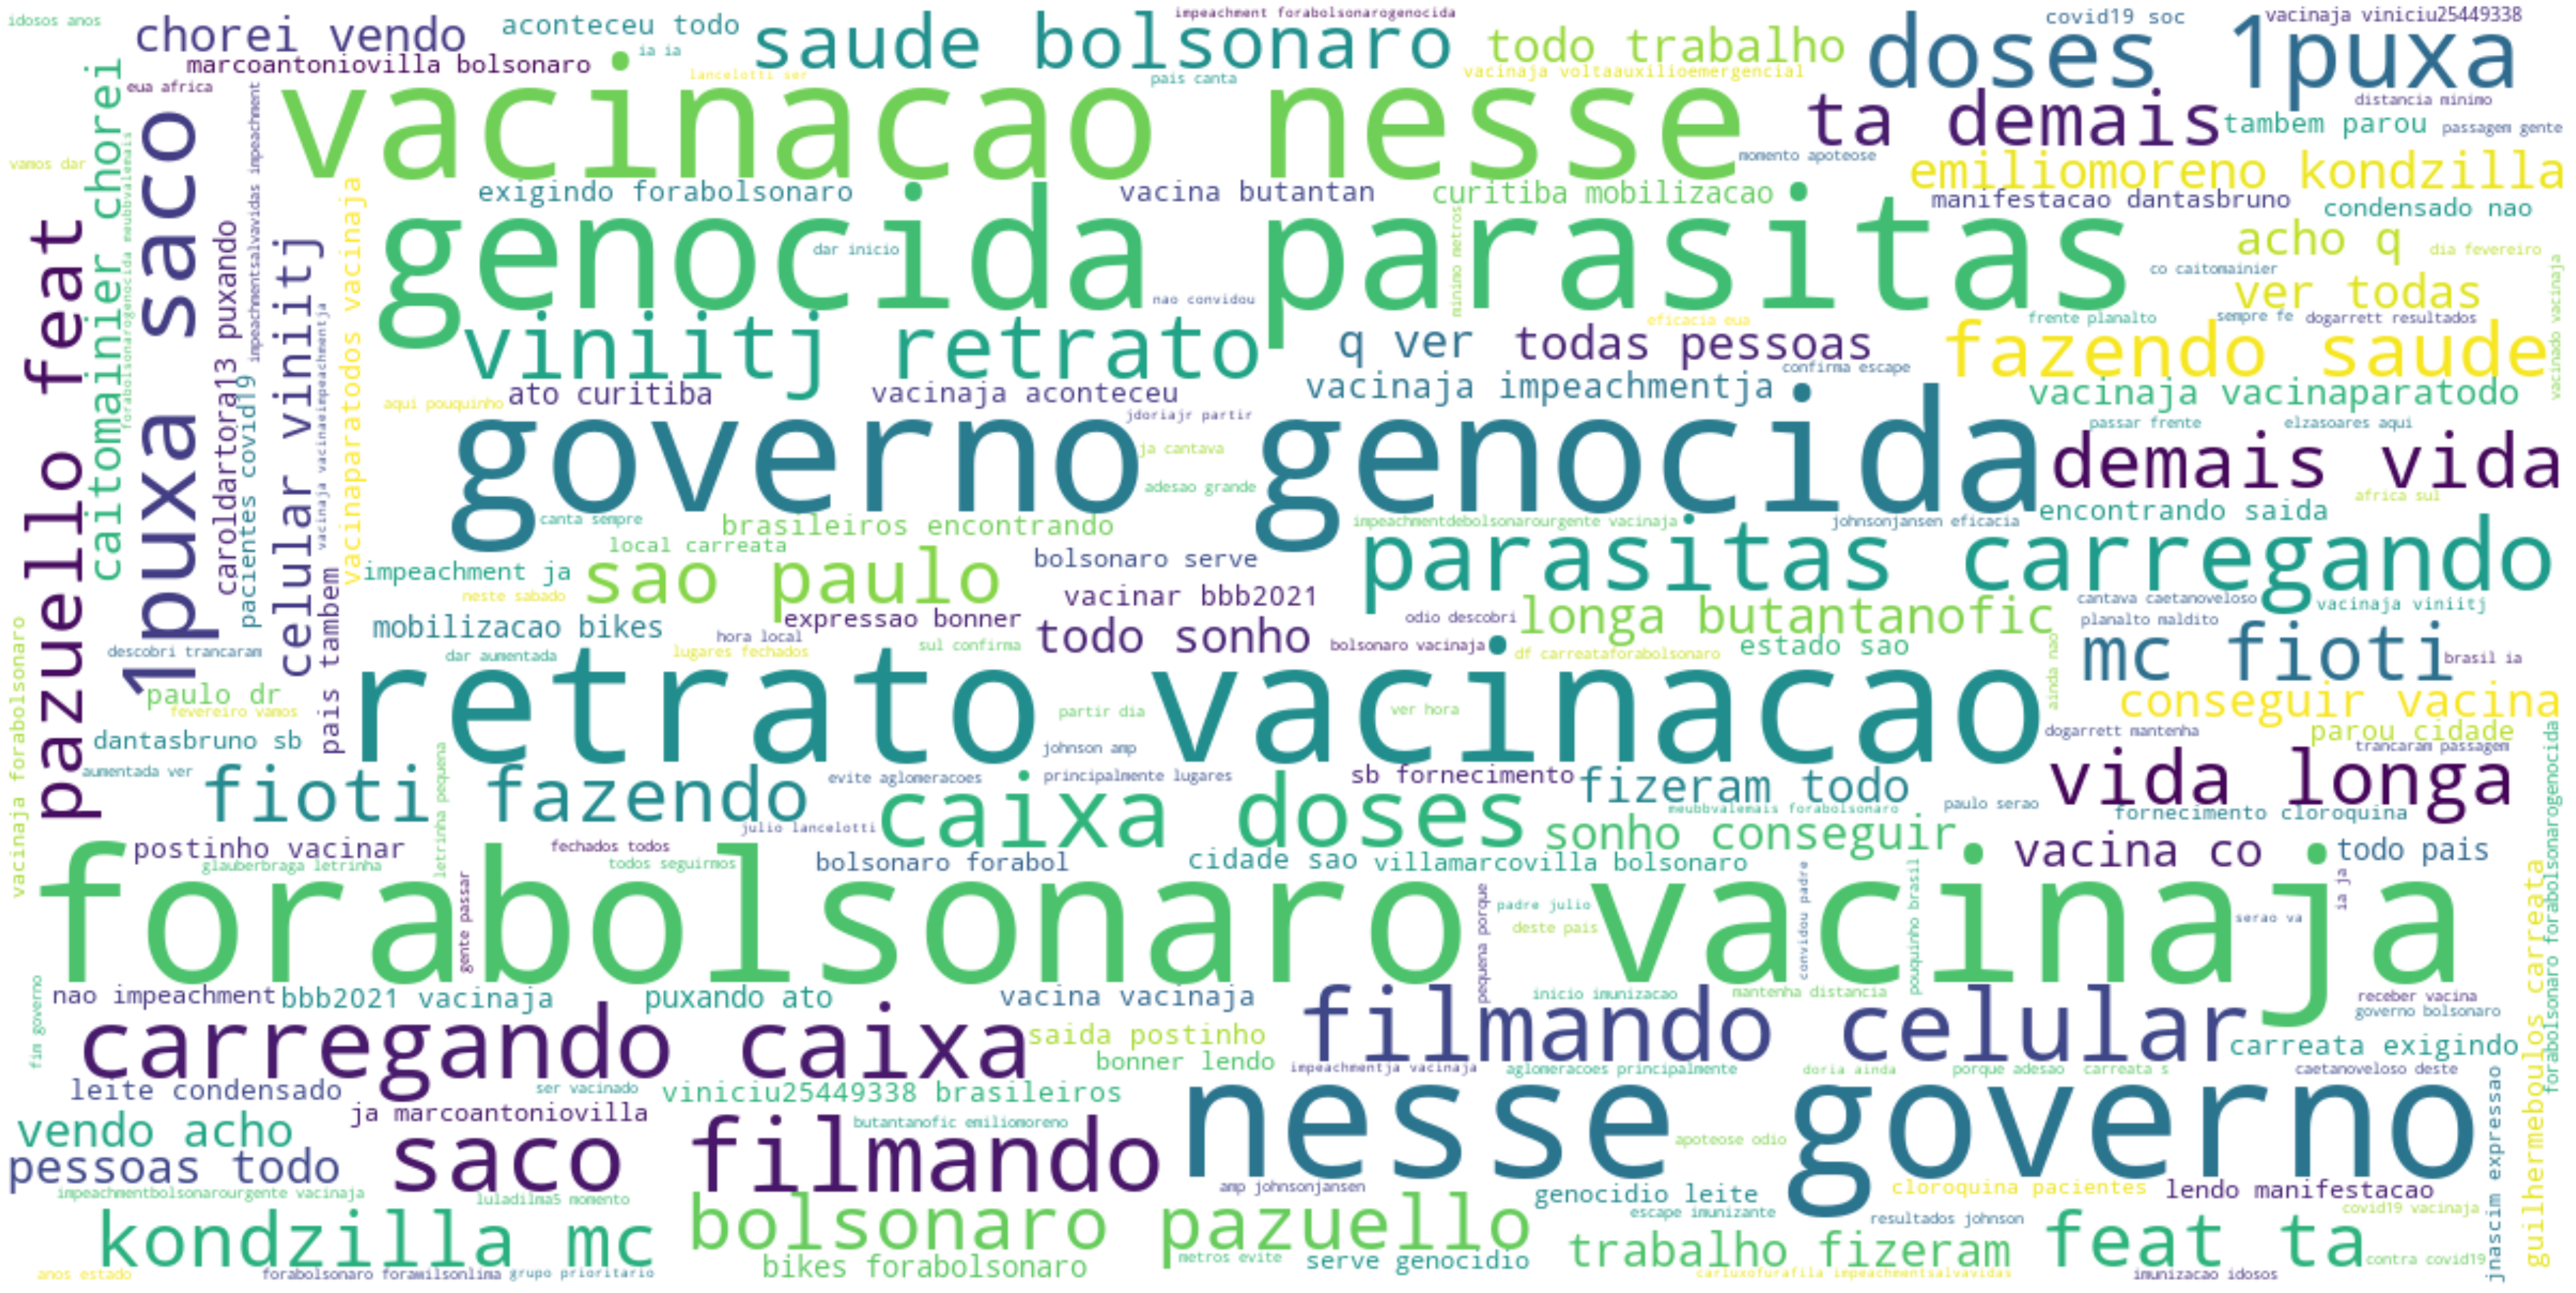

# Resultados - Quais os perfils que mais publicaram ?

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_tweets['perfil'].unique()[:10], y=df_tweets[['perfil']].value_counts()[:10], name='Perfis'))

fig.update_layout(title='Quais os perfils que mais publicaram?')

fig.show()


In [ ]:
##

In [ ]:
##

In [ ]:
##

In [ ]:
##

In [ ]:
##

In [ ]:
##

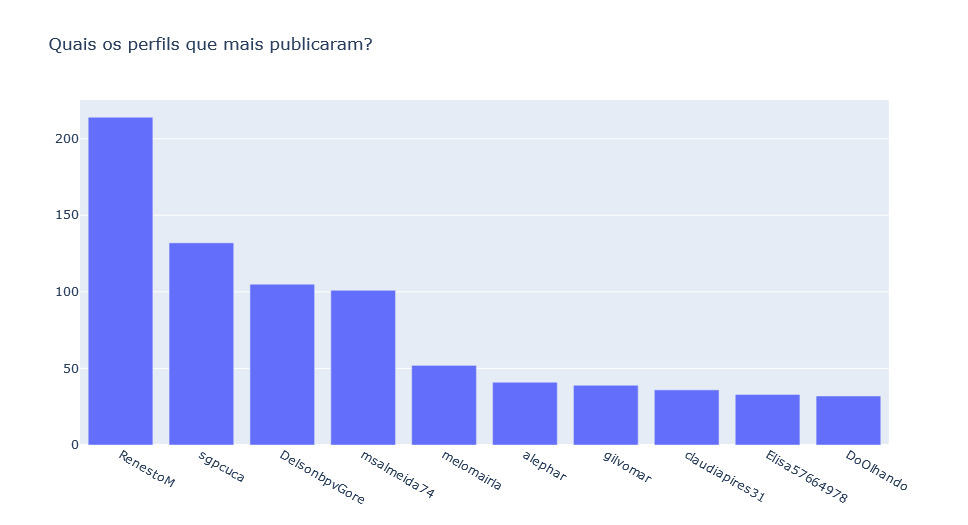

## Qual o dia que ocorreu mais publicações? 

In [ ]:
df_tweets.iloc[0]['criado_em']

df_tweets['dia'] = df_tweets['criado_em'].apply(lambda data:datetime.strptime(data, '%Y-%m-%d %H:%M:%S').day)

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_tweets['dia'].unique(), y=df_tweets[['dia']].value_counts().values, name='Tweets'))

fig.update_traces (textposition = 'top center')
fig.update_layout(title_text='Qual o dia que ocorreu mais publicações? ')

fig.show()

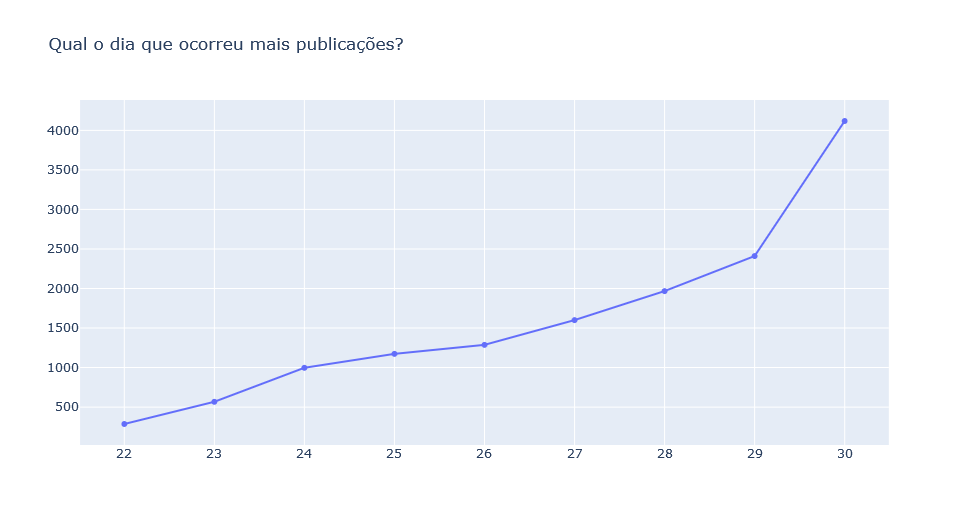

# Obrigado!